
# Ensemble Classification




In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import neighbors, datasets
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from scipy.spatial import ConvexHull
%matplotlib inline

In [3]:
Dp0=pd.read_csv('./data_st/S_MPOS_27_100',delimiter=" ",header=None)
Dn0=pd.read_csv('./data_st/S_MNEG_27_100',delimiter=" ",header=None)

Dp0s=Dp0
Dn0s=Dn0.sample(Dp0s.index.size)
Dn0s=Dn0.sample(2000)


D=pd.concat([Dp0s,Dn0s])
X=D.values
y=np.append(np.zeros([Dp0s.index.size,1]),np.ones([Dn0s.index.size,1]))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

In [4]:
FPR=[]
TPR=[]

0.5718206246420862
0.5639663450949297
0.5262147041980529
0.575930575745562
0.5732258490815383


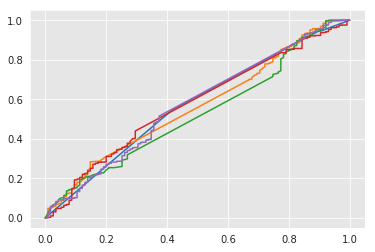

In [5]:
CLASSIFIERS=[DecisionTreeClassifier(max_depth=None, min_samples_split=2,
     random_state=0),
            RandomForestClassifier(n_estimators=500, max_depth=None,
  min_samples_split=2, random_state=0),
            ExtraTreesClassifier(n_estimators=500, max_depth=None,
     min_samples_split=2, random_state=0),
            AdaBoostClassifier(n_estimators=500),
            GradientBoostingClassifier(n_estimators=100,max_depth=4)]

for clf in CLASSIFIERS:
    clf.fit(X_train,y_train)
    y_pred=clf.predict_proba(X_test)
    fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred[:,1], pos_label=1)
    auc=metrics.auc(fpr, tpr)
    print auc
    
    plt.plot(fpr,tpr)

    FPR=np.append(FPR,fpr)
    TPR=np.append(TPR,tpr)

In [6]:
# MERGE DECISIONS TO BOOST AUC

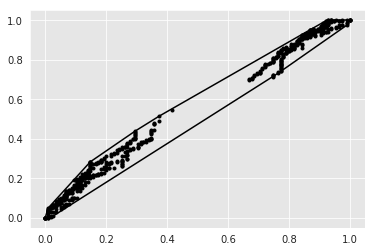

In [7]:
points=np.array([[a[0],a[1]] for a in zip(FPR,TPR)])
hull = ConvexHull(points)

plt.plot(points[:,0],points[:,1],'.k')
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'k-')

In [8]:
x=np.argsort(points[hull.vertices,:][:,0])
auc=metrics.auc(points[hull.vertices,:][x,0],points[hull.vertices,:][x,1])
print auc

0.5677106735386106


In [18]:
def getAuc(X,y,test_size=0.5,max_depth=None,n_estimators=100,minsplit=4,FPR=[],TPR=[]):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    CLASSIFIERS=[DecisionTreeClassifier(max_depth=max_depth, min_samples_split=minsplit),
                RandomForestClassifier(n_estimators=500, max_depth=max_depth,min_samples_split=minsplit),
                ExtraTreesClassifier(n_estimators=500, max_depth=max_depth,min_samples_split=minsplit),
                AdaBoostClassifier(n_estimators=500),
                GradientBoostingClassifier(n_estimators=100,max_depth=max_depth)]

    for clf in CLASSIFIERS:
        clf.fit(X_train,y_train)
        y_pred=clf.predict_proba(X_test)
        fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred[:,1], pos_label=1)
        auc=metrics.auc(fpr, tpr)
        #print auc

        #plt.plot(fpr,tpr)

        FPR=np.append(FPR,fpr)
        TPR=np.append(TPR,tpr)
    points=np.array([[a[0],a[1]] for a in zip(FPR,TPR)])
    hull = ConvexHull(points)
    x=np.argsort(points[hull.vertices,:][:,0])
    auc=metrics.auc(points[hull.vertices,:][x,0],points[hull.vertices,:][x,1])
    return auc

In [22]:
for i in range(10):
    print getAuc(X,y,minsplit=10)

0.5794799260145795
0.6218435030316217
0.5505996905374559
0.5817144526017907
0.6201883003712966
0.6064240340067822
0.6028990155203747
0.5949276400630463
0.5694064777998675
0.6104180874441161
